## Universidad del Valle de Guatemala
### Data science 1
### Laboratorio 2

Integrantes:
* Andrei Portales 19825
* Christian Perez 19710
* Sofía Rueda
* Oscar Ramos

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *

from prophet import Prophet

c:\Users\Christian\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('data/GlobalLandTemperaturesByCountry.csv')
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

### Analisis Exploratorio

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [4]:
data.shape

(577462, 4)

In [5]:
explore(data)

dtypes   count  null_sum  null_pct  nunique  \
AverageTemperature             float64  544811     32651     0.057    71085   
AverageTemperatureUncertainty  float64  545550     31912     0.055     8979   
Country                         object  577462         0     0.000      243   
dt                              object  577462         0     0.000     3239   

                                       min     25%     50%     75%  \
AverageTemperature                 -37.658  10.025  20.901  25.814   
AverageTemperatureUncertainty        0.052   0.323   0.571   1.206   
Country                        Afghanistan       -       -       -   
dt                              1743-11-01       -       -       -   

                                      max       mean  median        std  \
AverageTemperature                 38.842  17.193354  20.901  10.953966   
AverageTemperatureUncertainty      15.003   1.019057   0.571    1.20193   
Country                             Åland          -       -          -   
dt                             2013-09-01          -       -          -   

                                   skew  
AverageTemperature            -1.114297  
AverageTemperatureUncertainty  3.142598  
Country                               -  
dt                                    -

In [6]:
profiler = ProfileReport(data)

In [7]:
# Reporte a html para poder visualizarlo en un navegador
html = profiler.to_html()
file = open("reporte.html", "w", encoding="utf-8")
file.write(html)
file.close()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


In [3]:
data['dt'] = pd.to_datetime(data['dt'])
# data.set_index('dt', inplace=True)
data.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0 1743-11-01               4.384                          2.294   Åland
1 1743-12-01                 NaN                            NaN   Åland
2 1744-01-01                 NaN                            NaN   Åland
3 1744-02-01                 NaN                            NaN   Åland
4 1744-03-01                 NaN                            NaN   Åland

In [4]:
#get month from date
data['month'] = data['dt'].dt.month

In [5]:
# month were average temperature is highest
mes_mayortemp = data.groupby('month').mean()['AverageTemperature']

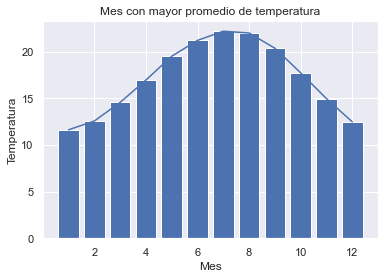

In [6]:
# graph of month with highest average temperature
plt.bar(mes_mayortemp.index, mes_mayortemp)
plt.plot(mes_mayortemp)
plt.title('Mes con mayor promedio de temperatura')
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.show()

#### Se puede observar que en promedio, los meses con mayor temperatura son julio y agosto, mientras que enero, febrero y diciembre son los meses con menor temperatura

In [7]:
#group by country and get average temperature
data_country = data.groupby('Country')['AverageTemperature'].mean()

In [8]:
#group by contry and month and get average temperature
data_country_month = data.groupby(['Country', 'month'])['AverageTemperature'].mean()

In [14]:
data_country_month.sort_values(ascending=True).head(10)

Country    month
Greenland  2       -30.662555
           1       -30.594199
Denmark    2       -30.034901
           1       -29.981000
Greenland  12      -29.638516
Denmark    12      -29.016274
Greenland  3       -28.912654
Denmark    3       -28.289869
Greenland  11      -26.391116
Russia     1       -25.823145
Name: AverageTemperature, dtype: float64

#### Agrupando por país y mes, se puede ver que las temperaturas más bajas, en promedio, las tiene Groenlandia en los meses de enero y febrero, seguido por Dinamarca en esos mismos meses. 

In [15]:
data_country_month.sort_values(ascending=False).head(10)

Country               month
Kuwait                7        36.113628
United Arab Emirates  7        35.745605
Kuwait                8        35.588442
United Arab Emirates  8        35.222535
Qatar                 7        35.112778
Bahrain               7        34.828411
Qatar                 8        34.587754
United Arab Emirates  6        34.517833
Kuwait                6        34.439919
Bahrain               8        34.395857
Name: AverageTemperature, dtype: float64

#### Agrupando por país y mes, se puede ver que las temperaturas más altas, en promedio, las tiene Kuwait en el mes de julio, seguido por los Emiratos Arabes Unidos en el mismo mes.

In [9]:
data.drop(columns=['month'], inplace=True)

In [17]:
data

dt  AverageTemperature  AverageTemperatureUncertainty   Country
0      1743-11-01               4.384                          2.294     Åland
1      1743-12-01                 NaN                            NaN     Åland
2      1744-01-01                 NaN                            NaN     Åland
3      1744-02-01                 NaN                            NaN     Åland
4      1744-03-01                 NaN                            NaN     Åland
...           ...                 ...                            ...       ...
577457 2013-05-01              19.059                          1.022  Zimbabwe
577458 2013-06-01              17.613                          0.473  Zimbabwe
577459 2013-07-01              17.000                          0.453  Zimbabwe
577460 2013-08-01              19.759                          0.717  Zimbabwe
577461 2013-09-01                 NaN                            NaN  Zimbabwe

[577462 rows x 4 columns]

In [18]:
uni = data[['dt', 'AverageTemperature']]
uni.dropna(inplace=True)
uni

d:\universidad\2022 - segundo semestre\Data Science 1\lab2_datascience\venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dt  AverageTemperature
0      1743-11-01               4.384
5      1744-04-01               1.530
6      1744-05-01               6.702
7      1744-06-01              11.609
8      1744-07-01              15.342
...           ...                 ...
577456 2013-04-01              21.142
577457 2013-05-01              19.059
577458 2013-06-01              17.613
577459 2013-07-01              17.000
577460 2013-08-01              19.759

[544811 rows x 2 columns]

### Elegimos un inicio, fin y frecuencia para nuestra serie

* inicio: 2005
* fin: 2013
* frecuencia: mensual

In [19]:
INICIO = 2005
FINAL = 2013

interval = uni[uni['dt'].dt.year >= INICIO]
interval = interval[interval['dt'].dt.year <= FINAL]
interval

dt  AverageTemperature
3134   2005-01-01               1.379
3135   2005-02-01              -1.899
3136   2005-03-01              -3.197
3137   2005-04-01               3.610
3138   2005-05-01               7.593
...           ...                 ...
577456 2013-04-01              21.142
577457 2013-05-01              19.059
577458 2013-06-01              17.613
577459 2013-07-01              17.000
577460 2013-08-01              19.759

[25189 rows x 2 columns]

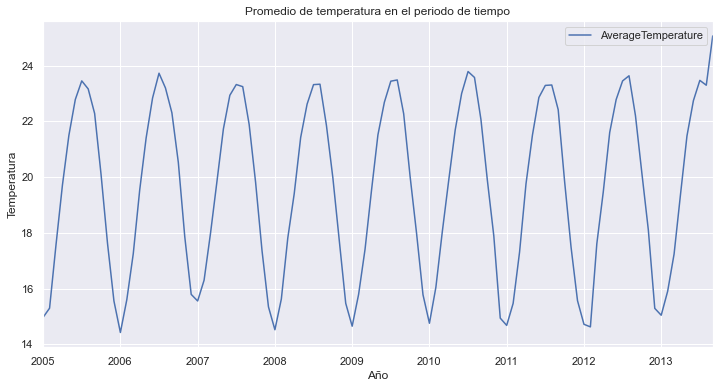

In [20]:
# Agrupar por mes y obtener el promedio de temperatura y graficarlo
interval_mean = interval.groupby('dt').mean()
interval_mean.plot(figsize=(12, 6))
plt.title('Promedio de temperatura en el periodo de tiempo')
plt.xlabel('Año')
plt.ylabel('Temperatura')
plt.show()


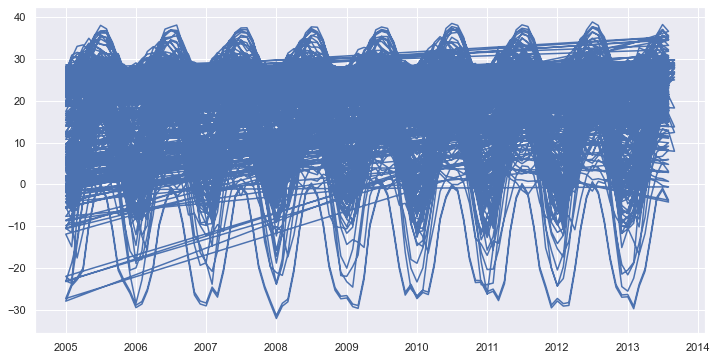

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(interval['dt'], interval['AverageTemperature'])

## Componentes de la serie

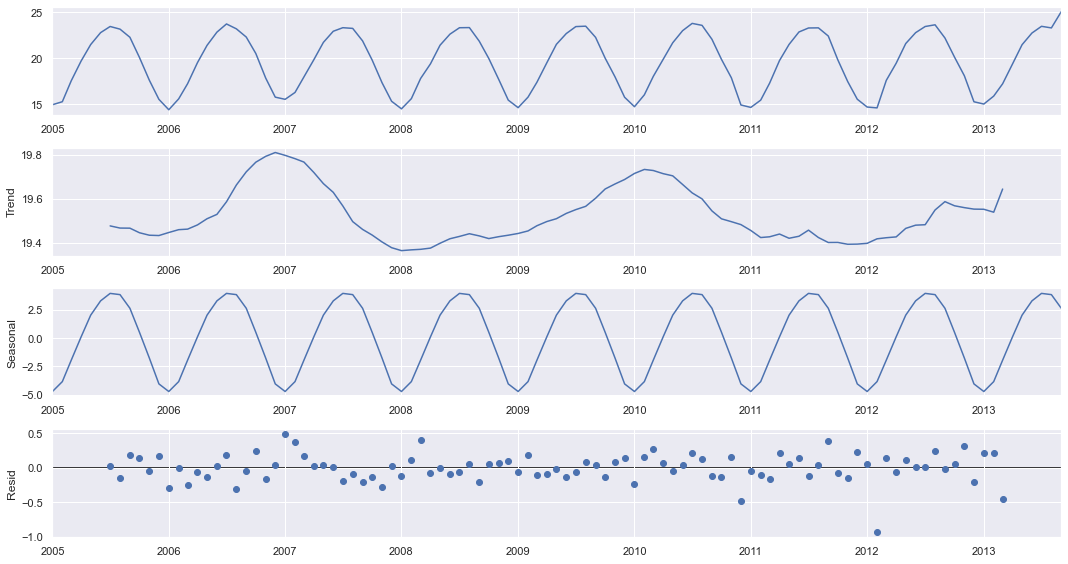

In [22]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(interval_mean, model='additive')
fig = decomposition.plot()
plt.show()

### Thumb Rule for Statistical Tests

* ADF: Autoregressive Determination Factors -> si el valor de p is menor que el valor critico, la serie es estacionaria
* OSCB: Order Statistics Check -> si el valor es menor a 0.64, la serie es estacionaria

In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(interval_mean))

Results of Dickey-Fuller Test:
Test Statistic                 -1.869900
p-value                         0.346351
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -1.869900
p-value                         0.346351
#Lags Used                     13.000000
Number of Observations Used    91.000000
Critical Value (1%)            -3.504343
Critical Value (5%)            -2.893866
Critical Value (10%)           -2.584015
dtype: float64
None


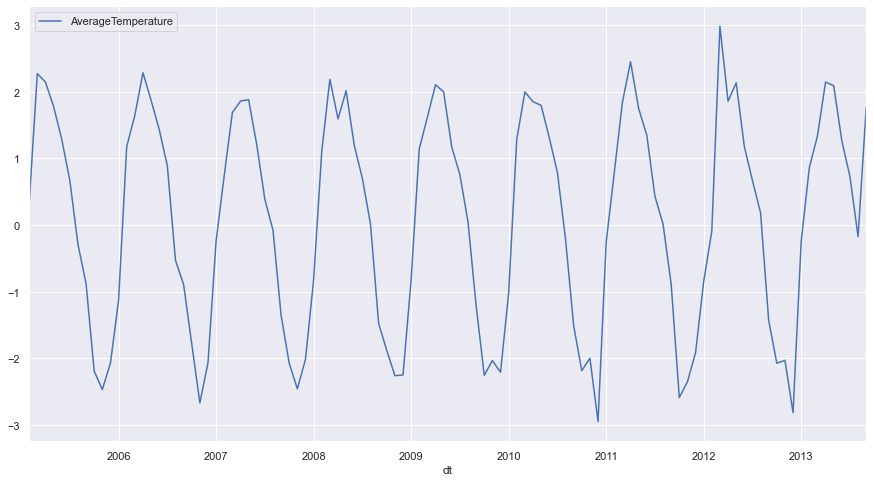

In [24]:
ts_t_adj = interval_mean - interval_mean.shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(interval_mean))

Tomando es cuenta estas grafica podemos darnos cuenta que estos datos no tienen una tendencia notable ya que esta se mantiene constante o no varia mucho. Tambien con los diferentes tests hechos podemos darnos cuenta que nuestra serie es estacionaria, esto ya que los valores siempre tienen el mismo comportamiento, siempre es casi igual todos los años del intervalo. Ademas que en la prueba de OSCB, el valor es menor a 0.64, esto significa que la serie es estacionaria.

<AxesSubplot:xlabel='dt'>

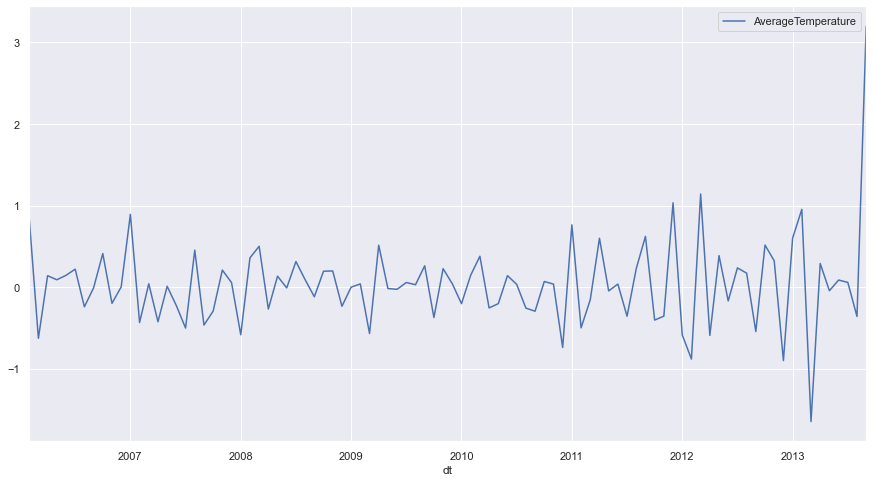

In [25]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

## Probando diferentes modelos

d:\universidad\2022 - segundo semestre\Data Science 1\lab2_datascience\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\universidad\2022 - segundo semestre\Data Science 1\lab2_datascience\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

d:\universidad\2022 - segundo semestre\Data Science 1\lab2_datascience\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



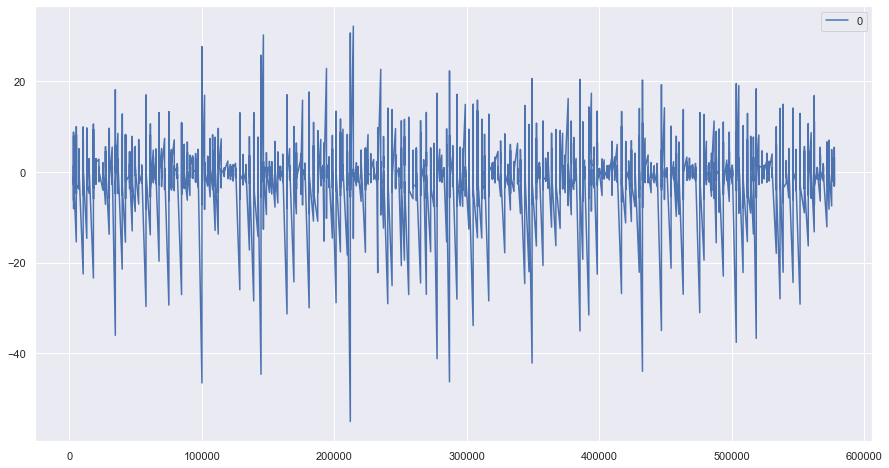

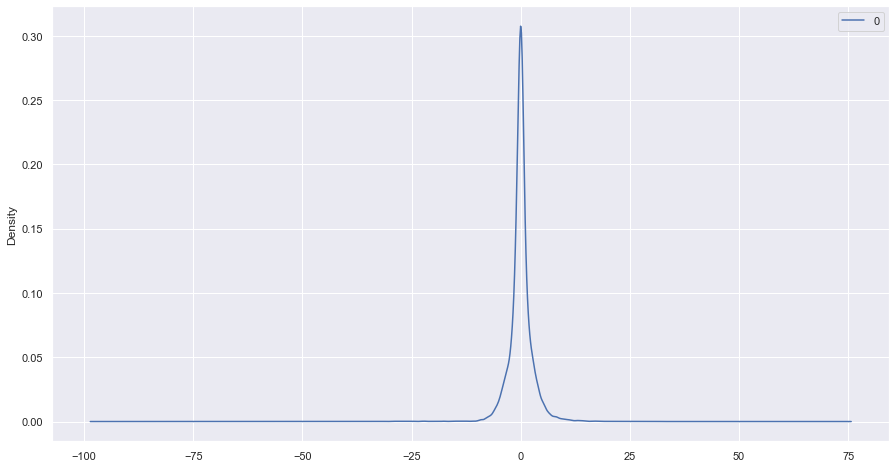

                  0
count  25189.000000
mean       0.000477
std        2.945304
min      -55.015278
25%       -0.935506
50%       -0.009389
75%        0.919032
max       32.111723


In [53]:
from statsmodels.tsa.arima.model import ARIMA

y = interval['AverageTemperature']

model = ARIMA(y, order=(1, 1, 0))
history = model.fit()
history.summary()

residuals = pd.DataFrame(history.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Evaluando el modelo

predicted=20.144936, expected=19.883388
predicted=17.817970, expected=17.886669
predicted=16.422454, expected=14.938876
predicted=13.034209, expected=14.677930
predicted=15.578188, expected=15.467058
predicted=17.072110, expected=17.310244
predicted=19.857057, expected=19.760128
predicted=22.248588, expected=21.508653
predicted=22.523777, expected=22.857417
predicted=23.087182, expected=23.290971
predicted=22.491485, expected=23.305562
predicted=22.336437, expected=22.419347
predicted=21.044648, expected=19.831426
predicted=17.506345, expected=17.479211
predicted=15.716213, expected=15.564537
predicted=14.475809, expected=14.717760
predicted=15.080561, expected=14.625161
predicted=15.769172, expected=17.609574
predicted=20.816660, expected=19.467372
predicted=21.644331, expected=21.601988
predicted=23.151279, expected=22.781781
predicted=22.968384, expected=23.451190
predicted=22.500968, expected=23.636789
predicted=22.786329, expected=22.206306
predicted=20.434036, expected=20.133950


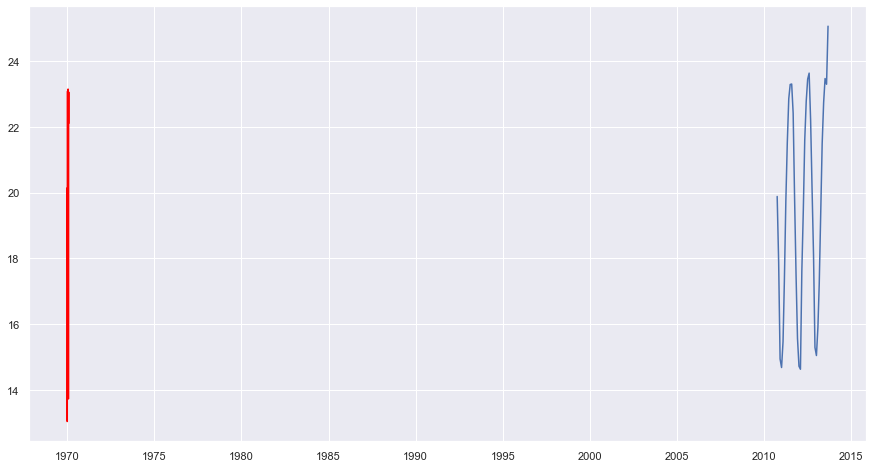

In [57]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = interval_mean['AverageTemperature']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


### Preparando los datos para crear el modelo Prophet

In [10]:
df = data.copy()

In [11]:
#delete columns AverageTemperatureUncertainty and Country
df.drop(columns=['AverageTemperatureUncertainty', 'Country'], inplace=True)

In [12]:
df['dt'] = pd.DatetimeIndex(df['dt'])

In [13]:
df = df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})

In [14]:
#delete rows with NaN
df.dropna(inplace=True)
#fix index
df.reset_index(drop=True, inplace=True)

### Creando modelo con Prophet para predecir 3 años anteriores

In [29]:
df_anterior = df[df.ds < '2011-01-01']

In [30]:
modelo1 = Prophet(interval_width=0.95)

In [31]:
modelo1.fit(df_anterior)

23:36:09 - cmdstanpy - INFO - Chain [1] start processing
23:40:09 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
fechas_futuras = modelo1.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
3165 2013-08-01
3166 2013-09-01
3167 2013-10-01
3168 2013-11-01
3169 2013-12-01

In [33]:
prediccion = modelo1.predict(fechas_futuras)

In [34]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3165 2013-08-01  24.404241    5.210658   43.176342
3166 2013-09-01  22.886762    3.195318   43.028739
3167 2013-10-01  20.342726    0.906390   38.993936
3168 2013-11-01  17.528383   -1.976830   35.937528
3169 2013-12-01  14.983665   -3.256147   34.077497

In [40]:
ultimos3_pred = prediccion[prediccion.ds > '2011-01-01']

In [38]:
ultimos3 = df[df.ds > '2011-01-01']

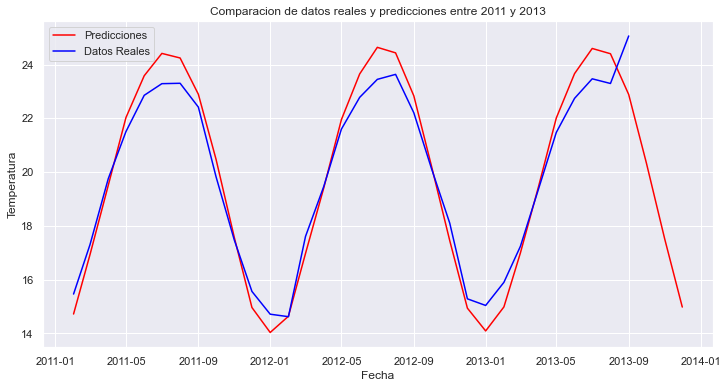

In [63]:
ultimos3_grouped = ultimos3.groupby(['ds']).mean()
plt.figure(figsize=(12, 6))
plt.plot(ultimos3_pred['ds'], ultimos3_pred['yhat'], color='red', label='Prediccion')
plt.plot(ultimos3_grouped, color='blue', label='Datos Reales')
plt.title('Comparacion de datos reales y predicciones entre 2011 y 2013')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.legend(['Predicciones', 'Datos Reales'])
plt.show()

#### Como se puede observar, la prediccion de los ultimos 3 años (rojo), es decir entre 2011 y 2013, fue muy certera en comparacion con los datos reales (azul) de esos años. Se puede decir que el modelo dio buenos resultados.

### Creando el modelo con Prophet para predecir 3 años en un futuro

In [15]:
mi_modelo = Prophet(interval_width=0.95)

In [16]:
mi_modelo.fit(df)

23:20:56 - cmdstanpy - INFO - Chain [1] start processing
23:26:18 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
fechas_futuras = mi_modelo.make_future_dataframe(periods=36, freq='MS')
fechas_futuras.tail()

ds
3198 2016-05-01
3199 2016-06-01
3200 2016-07-01
3201 2016-08-01
3202 2016-09-01

In [18]:
prediccion = mi_modelo.predict(fechas_futuras)

In [19]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
3198 2016-05-01  22.014765    3.692881   41.992157
3199 2016-06-01  23.705383    4.083372   42.784653
3200 2016-07-01  24.690026    5.124926   44.789628
3201 2016-08-01  24.488044    4.249163   43.515034
3202 2016-09-01  22.898520    3.170840   41.799293

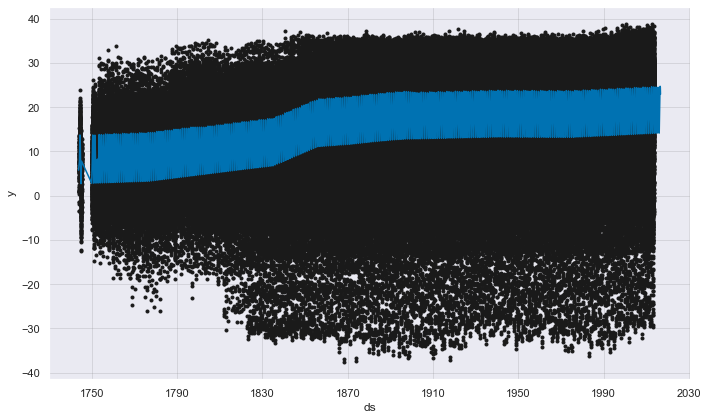

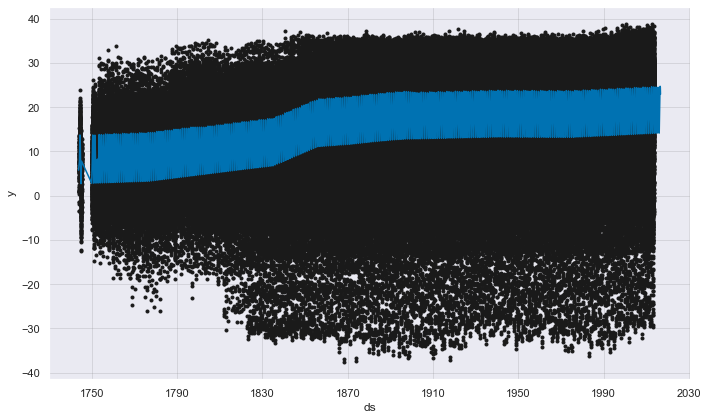

In [20]:
mi_modelo.plot(prediccion, uncertainty=False)

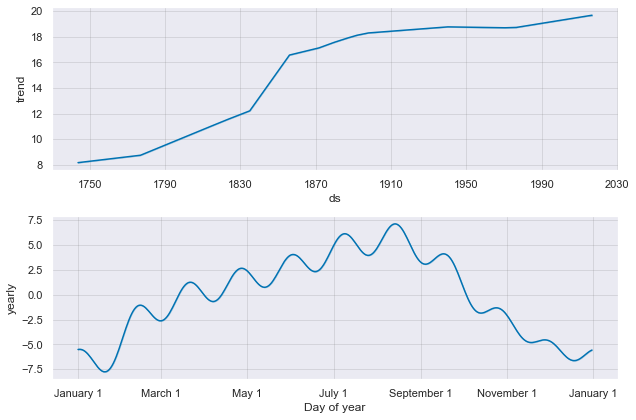

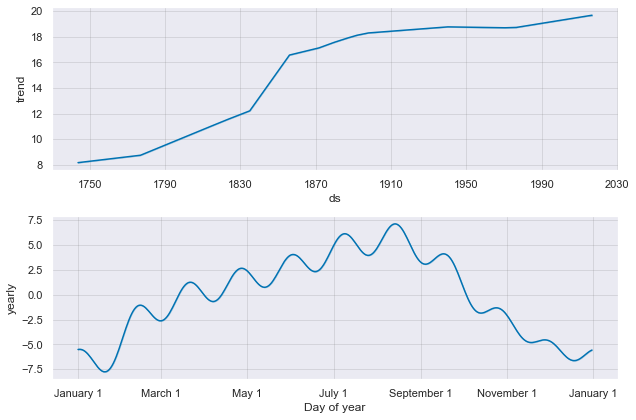

In [21]:
mi_modelo.plot_components(prediccion)

#### Como se puede apreciar en las gráfica, el promedio en la temperatura si ha ido incrementando durante los ultimos años. Viendo las predicciones realizadas por el modelo de series de tiempo utilizando Prophet, en los próximos tres años, la temperatura seguirá creciendo, por lo que podemos afirmar que si hay un cambio climatico poco a poco y el calentamiento global es un hecho.